In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# смотрим на уникальные значения в столбцах с пропущенными значениями
NA = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
     'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
     'PoolQC', 'Fence', 'MiscFeature']
for i in NA:
    print(i, data[i].unique())



LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Alley [nan 'Grvl' 'Pave']
MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
MasVnrArea [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6

In [5]:
#столбец Id можно удалить
data.drop('Id', axis=1, inplace=True)

In [6]:
# заменим у числовых признаков nan на 0
to_null =['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for i in to_null:
    data[i].fillna(0, inplace=True)

In [7]:
# заменим у категориалных признаков nan на 'None'
to_none = ['Alley', 'MasVnrType', 'Electrical', 'FireplaceQu', 
           'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
          'GarageType', 'GarageQual', 'GarageFinish', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for i in to_none:
    data[i].fillna('None', inplace=True)

In [8]:
# Разделим датасет на данные с признаками X и целевой переменной y
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

In [9]:
dumm_cols = X.columns[X.dtypes == 'object']

In [10]:
# применим OneHotEncoding к категориальным признакам
Xd = pd.get_dummies(X, columns=dumm_cols)

In [11]:
# Разбиваем на train/test. test будет hold-out
from sklearn.model_selection import ShuffleSplit

random_splitter = ShuffleSplit(n_splits=1, test_size=0.1, random_state=63)

for train_index, test_index in random_splitter.split(Xd, y):
    Xd_train = Xd.iloc[train_index]
    y_train = y.iloc[train_index]
    
    Xd_test = Xd.iloc[test_index]
    y_test = y.iloc[test_index]
len(y_train), len(y_test) 

(1314, 146)

In [12]:
# Разбиваем на 10 фолдов
d_train = []
d_test = []
yy_train = []
yy_test = []
splitter = ShuffleSplit(n_splits=10, test_size=0.3, random_state=63)

for train_index, test_index in splitter.split(Xd_train, y_train):
    d_train.append(Xd_train.iloc[train_index])
    d_test.append(Xd_train.iloc[test_index])
    
    yy_train.append(y_train.iloc[train_index])
    yy_test.append(y_train.iloc[test_index])

In [13]:
# Функция расчета среднего score по фолдам
def mean_score(d_train, yy_train, d_test, yy_test, 
               n_estimators=20, max_depth=5, min_samples_leaf=20, max_features=0.5):
    scores = []
    for x_tr, y_tr, x_t, y_t in zip(d_train, yy_train, d_test, yy_test):
        regr = RandomForestRegressor(n_estimators=n_estimators, 
                                     max_depth=max_depth, 
                                     min_samples_leaf=min_samples_leaf,
                                     max_features=max_features,
                                     n_jobs=-1, 
                                     random_state=0)
        regr.fit(x_tr, y_tr.values.ravel())
        scores.append(regr.score(x_t, y_t))
    return sum(scores) / len(scores)

In [86]:
%%time
# Найдем лучшие параметры для модели
# диапазон гиперпараметров уменьшен с целью сокращения времени расчетов. Стало ~20 мин.
best_score = 0
for estimator in range(5, 10):
    for depth in range(1, 11):
        for leaf in range(1, 6):
            for feature in np.linspace(0.1, 0.5, 5):
                score = mean_score(d_train, yy_train, d_test, yy_test, 
                                n_estimators=estimator, max_depth=depth, min_samples_leaf=leaf, max_features=feature)
                if score > best_score:
                    best_score = score
                    best_parameters = {'n_estimators': estimator, 'max_depth': depth, 
                                   'min_samples_leaf': leaf, 'max_features': feature}
                    

print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшие значения параметров: {}".format(best_parameters))                

Наилучшее значение правильности: 0.82
Наилучшие значения параметров: {'n_estimators': 9, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 0.5}
Wall time: 27min 54s


In [88]:
# Функция вывода графика важности признаков
def plot_feature_importances(top):
    plt.figure(figsize=(14,5)) 
    n_features = top.count()
    plt.barh(range(n_features), top.values, align='center')
    plt.yticks(np.arange(n_features), top.index)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")

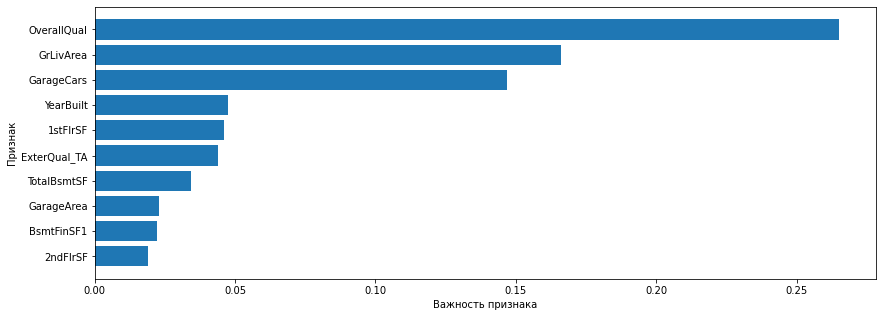

In [89]:
# Выведем важность TOP10 признаков

regr = RandomForestRegressor(**best_parameters, n_jobs=-1, random_state=0)

regr.fit(Xd_train, y_train.values.ravel())
TOP10s = pd.Series(regr.feature_importances_, Xd.columns).sort_values()[-10:]
plot_feature_importances(TOP10s)

Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

In [37]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [127]:
#Задаем параметры Ансамблевой модели с 10 фолдами

regressor = StackingRegressor(
    [
        ('lr', LinearRegression()),
        ('knr', KNeighborsRegressor(n_neighbors=10, weights='distance', n_jobs=-1)),
        ('dtr', DecisionTreeRegressor(max_depth=10, min_samples_leaf=1))
    ],
RandomForestRegressor(max_depth=10, n_estimators=200, min_samples_leaf=1,n_jobs=-1), cv=10, passthrough=False)

In [128]:
regressor.fit(Xd_train, y_train.values.ravel())

StackingRegressor(cv=10,
                  estimators=[('lr', LinearRegression()),
                              ('knr',
                               KNeighborsRegressor(n_jobs=-1, n_neighbors=10,
                                                   weights='distance')),
                              ('dtr', DecisionTreeRegressor(max_depth=10))],
                  final_estimator=RandomForestRegressor(max_depth=10,
                                                        n_estimators=200,
                                                        n_jobs=-1))

In [129]:
 # Посмотрим результат на hold-out-выборке
print('Общая модель (Случайный лес): \t', regressor.score(Xd_test, y_test))
print('Линейная регрессия: \t', regressor.named_estimators_['lr'].score(Xd_test, y_test))
print('Ближайшие соседи: \t', regressor.named_estimators_['knr'].score(Xd_test, y_test))
print('Решающее дерево: \t', regressor.named_estimators_['dtr'].score(Xd_test, y_test))

Общая модель (Случайный лес): 	 0.893059569588647
Линейная регрессия: 	 0.7580404940486187
Ближайшие соседи: 	 0.5311588774782692
Решающее дерево: 	 0.8480137671983863


 final_estimator показал score выше, чем у моделей 1-го уровня